# Question 2 Exams
### Name: Ioannis Konstantakopoulos , 
### st.num:0960047

My first though when i saw the CEO word in the assignment was to try and find if there is any increse in females appearences now rather than 15-20 years ago. I tried to find some numbers about the ratio of male and female CEO's, my expectations is that the number of CEO's back then as the paper indicates(https://www.researchgate.net/figure/Females-as-a-percent-of-all-non-CEO-top-executives-and-as-a-percent-of-all-CEOs_fig2_235310605) back in 2004 there where only 2% of women CEO's. I think the proportion has changed to a more -but not even close to equal- proportion nowadays. As the article declares even now the proportion of women CEO's At Fortune 500 Companies (https://www.statista.com/chart/13995/female-ceos-in-fortune-500-companies/) is still really low at 7%. Although it was doubled i expected more women to have power positions. 

I will use the google images downloader to download pictures titled 'CEO' to see if my findings will be the same as the article. I will first use cascadeing classifier to perform face detection. Then iterate through all the faces in the photo and perform gender classification. After that i will count the number of female and male faces so i can have the proportion of my predictions 

In [6]:
!pip install wget
!pip install git+https://github.com/Joeclinton1/google-images-download.git --upgrade 

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-utgepv24
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-utgepv24
     |████████████████████████████████| 911kB 6.3MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15792 sha256=5947eaf91276fa76a097fdfaa3f6f6c905ba278b4fa3321f4d42869326fcf0dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-zv2wz3_j/wheels/1a/36/c9/53bd827bc241b69fe47b90731625459627f82694ecd8a88273
Successfully built google-images-download


In [3]:
import io
import urllib

import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd

import cv2

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow_hub as hub
from urllib.request import urlopen

import re
import pytesseract
from PIL import Image

from tensorflow.keras.models import load_model

import colorgram
from matplotlib.colors import to_hex

import matplotlib as mpl
import webcolors

from os import listdir
from os.path import isfile, join

import wget

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
MY_QUERY = "CEO"
N_IMAGES = 80
OUTPUT_DIR = '/content/drive/MyDrive/Q2'

In [7]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload() 
arguments = {"keywords": MY_QUERY,
             "limit": N_IMAGES, 
             "output_ todirectory":OUTPUT_DIR,
             "print_urls":True}   
paths = response.download(arguments) 


Item no.: 1 --> Item name = CEO
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Group_of_Fortune_500_CEOs_in_2015_%28cropped_to_remove_non-CEO%29.jpg/220px-Group_of_Fortune_500_CEOs_in_2015_%28cropped_to_remove_non-CEO%29.jpg
Completed Image ====> 1.220px-group_of_fortune_500_ceos_in_2015_%28cropped_to_remove_non-ceo%29.jpg
Image URL: https://s3.amazonaws.com/utep-uploads/wp-content/uploads/sparkle-box/2019/04/30112737/Female-CEO.jpg
Completed Image ====> 2.female-ceo.jpg
Image URL: https://personalexcellence.co/files/ceo.jpg
Completed Image ====> 3.ceo.jpg
Image URL: https://mms.businesswire.com/media/20200218005271/en/773989/5/Odilon_Almeida_Headshot_1.jpg
Completed Image ====> 4.odilon_almeida_headshot_1.jpg
Image URL: https://www.mckinsey.com/~/media/McKinsey/Business%20Functions/McKinsey%20Digital/Our%20Insights/The%20CEOs%20new%20technology%20agenda/CEO-standard-Offset300-1536x1536.jpg
Completed Image ====> 5.ceo-standard-o

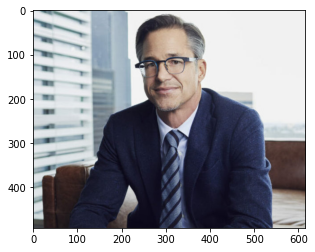

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread(paths[0][MY_QUERY][21])) # prints our first image

A quick veiw in my images, I found that indeed the males are way more than females but the proportion of females is way more than 7%. Maybe the google images are biased to promote females so more and more taking actions and aply for CEO's positions

In [ ]:
import os
from PIL import Image

OUTPUT_DIR_QUERY = os.path.join(OUTPUT_DIR, MY_QUERY)
for filename in os.listdir(OUTPUT_DIR_QUERY):
    output_dir_file = os.path.join(OUTPUT_DIR_QUERY, filename)
    try :
        with Image.open(output_dir_file) as im:
             print('ok')
    except :
        print(output_dir_file)
        os.remove(output_dir_file)
            

In [13]:
#Code manual
%config InlineBackend.figure_format='retina' 

def load_image_from_url(url, target_size=None, color_mode='rgb'):
    assert color_mode in ('grayscale', 'rgb'), 'color_mode must be "grayscale" or "rgb"'
    response = urllib.request.urlopen(url)
    img = Image.open(io.BytesIO(response.read()))
    img = img.convert('RGB')
    if color_mode == 'grayscale':
        img = ImageOps.grayscale(img)
    if target_size:
        img = img.resize(target_size, Image.NEAREST) # resize
    return image.img_to_array(img)

def load_image_from_path(image_path, target_size=None, color_mode='rgb'):
    pil_image = image.load_img(image_path, 
                               target_size=target_size,
                            color_mode=color_mode)
    return image.img_to_array(pil_image)

In [16]:
# import a list of all movie poster file names.
mypath = '/content/drive/MyDrive/Q2/CEO'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [23]:
CEO = pd.DataFrame()
CEO['File_name'] = onlyfiles
CEO.head()

,File_name
0,42.albertbourla.jpg
1,4.odilon_almeida_headshot_1.jpg
2,18.http%3a%2f%2fcom.ft.imagepublish.upp-prod-u...
3,14.nu_msl_-_understanding_ceo_leadership_style...
4,22.barton.jpg


In [18]:
#Code manual
# face classification
model_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
face_model = wget.download(model_url)

face_classification = cv2.CascadeClassifier(face_model) # load the classifier only once!

def apply_offsets(face_coordinates, offsets):
    """
    Derived from https://github.com/oarriaga/face_classification/blob/
    b861d21b0e76ca5514cdeb5b56a689b7318584f4/src/utils/inference.py#L21
    """
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

gender_classifier = load_model('/content/drive/MyDrive/5.2/gender_mini_XCEPTION.21-0.95.hdf5') # load this only once! (not in a loop)
GENDER_OFFSETS = (10, 10)
INPUT_SHAPE_GENDER = gender_classifier.input_shape[1:3]

In [21]:
#Code myself+manual i used try except to find if there are any pictures not detected by the code
labels = ['woman', 'man']
n_female = []
n_male = []

for i in onlyfiles:
    pre_image = load_image_from_path(''.join(('/content/drive/MyDrive/Q2/CEO/',i)), color_mode='grayscale')
    gray_image = np.squeeze(pre_image).astype('uint8')

    face_classification = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # load the classifier 
    faces = face_classification.detectMultiScale(gray_image, 1.3, 5) # detect the faces
    
    male = 0
    female = 0
    
    for face_coordinates in faces: # using the output of the CascadeClassifier
        try:
            x1, x2, y1, y2 = apply_offsets(face_coordinates, GENDER_OFFSETS) # extends the bounding box
            face_img = gray_image[y1:y2, x1:x2] # only get the face 
            face_img = cv2.resize(face_img, (INPUT_SHAPE_GENDER)) # resize the image
            face_img = face_img.astype('float32') / 255.0 # preprocess the image
            face_img = np.expand_dims(face_img, 0) # batch of one
            probas = gender_classifier.predict(face_img)
        except:
            print('Error..continuing')
            continue
            
        if labels[np.argmax(probas[0])] == 'man':
            male += 1
        elif labels[np.argmax(probas[0])] == 'woman':
            female += 1
    
    n_male.append(male)
    n_female.append(female)

Error..continuing


In [24]:
CEO['n_male'] = n_male
CEO['n_female'] = n_female
CEO.head()

,File_name,n_male,n_female
0,42.albertbourla.jpg,1,0
1,4.odilon_almeida_headshot_1.jpg,0,2
2,18.http%3a%2f%2fcom.ft.imagepublish.upp-prod-u...,1,0
3,14.nu_msl_-_understanding_ceo_leadership_style...,5,1
4,22.barton.jpg,1,0


In [25]:
CEO['n_male'].sum()

62

In [26]:
CEO['n_female'].sum()

38

### Conclusion

Watching the results i saw that my first expectation was completely off, i was expecting something like 7-10% of the photos showing a woman instead the proportion that i have from my data is almost 40%! One of the solutions that i have in mind is in some pictures there are many faces.Maybe one of them is the ceo but my code is taking all of them as possible faces and findes the gender. So the accuracy may be not the best,also another reason as i wrote above might be the promosion for women to apply for better possitions. The mainly reason of my research was to prove the number of women CEO has increassed the last 15-20 years. I also though of making emotion classification but the gender was more into my research purpose, although emotion in any way is another feature that seems to have some value to me and maybe worth discussion.They are relly important in the highest positions as they are the ones to take the most taught decissions. All in all my results are not close to the articles but i think that the proportion of women CEO's is changing faster that ever before at least from the google search findings.